**Logistic Regression as a Soft Decision Model**

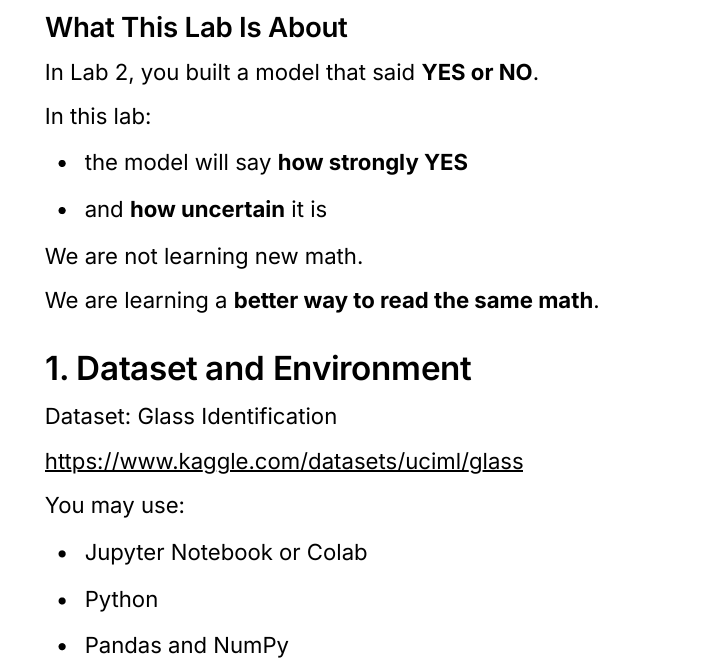

**What You Must Submit**
1. Notebook with completed TODOs
2. Short explanations after each major step:


*   what this step does
*   why it is needed
3.  One paragraph answering:

*   how this differs from perceptron
*   why sigmoid matters

*   what problem still remains unsolved





In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv("glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Explanation**

**What this step does:**
Loads the dataset into a table format where each row is a sample and each column is a feature or label.

**Why it is needed:**
Machine learning models require numerical data in structured form to learn patterns.

In [2]:
#Looking at the Dataset
# Shape of dataset
print("Shape:", df.shape)
# Column names
print("Columns:", df.columns)
# First few rows
df.head()

Shape: (214, 10)
Columns: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#Convert to Binary Classification
# Create binary label
df["y"] = (df["Type"] == 1).astype(int)
# Remove original Type column
df = df.drop(columns=["Type"])
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,y
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Explanation**

**What this step does:**
Converts the multi-class problem into a binary classification task.

**Why it is needed:**
Logistic regression is designed to handle binary outputs.

In [5]:
#Separate Inputs and Output
import numpy as np
X = df.drop(columns=["y"]).values
y = df["y"].values
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (214, 9)
y shape: (214,)


**Explanation**

**What this step does:**
Separates features (X) from labels (y).

**Why it is needed:**
Models learn patterns from inputs (X) to predict outputs (y).

In [6]:
#Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Explanation**

**What this step does:**
Splits the data into training and testing sets.

**Why it is needed:**
To evaluate the model on unseen data and avoid overfitting.

In [7]:
#Scale the Inputs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Explanation**

**What this step does:**
Standardizes features to have zero mean and unit variance.

**Why it is needed:**
Prevents features with larger values from dominating and stabilizes learning.

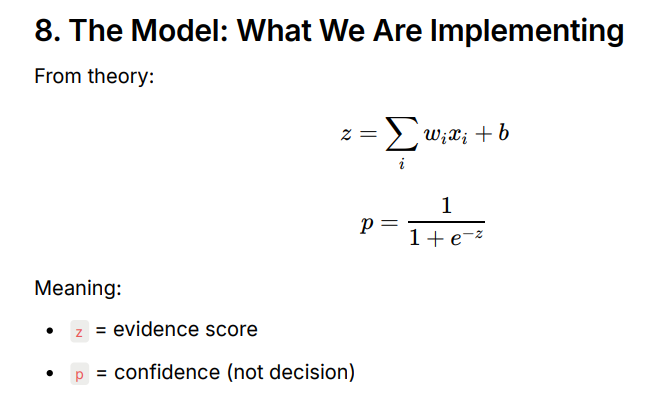

In [8]:
#Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

**Explanation**

**What this step does:**
Converts any real number into a value between 0 and 1.

**Why it is needed:**
To interpret model output as probability instead of a hard decision.

In [9]:
#Forward Computation
def predict_proba(X, w, b):
    z = X @ w + b
    p = sigmoid(z)
    return p

**Explanation**

**What this step does:**
Computes the probability that each sample belongs to the positive class.

**Why it is needed:**
The model must produce probabilities before making decisions.

In [10]:
#Loss Function
def loss(y, p):
    eps = 1e-8  # to avoid log(0)
    return -np.mean(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))

**Explanation**

**What this step does:**
Measures how wrong the predicted probabilities are.

**Why it is needed:**
Provides a signal for the model to improve its predictions.

In [11]:
#Learning Step
def update_weights(X, y, w, b, lr):
    p = predict_proba(X, w, b)
    error = p - y
    w = w - lr * (X.T @ error) / len(y)
    b = b - lr * np.mean(error)
    return w, b

**Explanation**

**What this step does:**
Updates weights and bias to reduce prediction error.

**Why it is needed:**
Learning happens by gradually adjusting parameters.

In [12]:
#Training Loop
w = np.zeros(X_train.shape[1])
b = 0.0
lr = 0.1
epochs = 100

for epoch in range(epochs):
    w, b = update_weights(X_train, y_train, w, b, lr)

    if epoch % 10 == 0:
        p = predict_proba(X_train, w, b)
        print(f"Epoch {epoch}, Loss: {loss(y_train, p):.4f}")

Epoch 0, Loss: 0.6822
Epoch 10, Loss: 0.6107
Epoch 20, Loss: 0.5748
Epoch 30, Loss: 0.5529
Epoch 40, Loss: 0.5379
Epoch 50, Loss: 0.5269
Epoch 60, Loss: 0.5184
Epoch 70, Loss: 0.5116
Epoch 80, Loss: 0.5060
Epoch 90, Loss: 0.5014


**Explanation**

**What this step does:**
Repeats the learning step multiple times.

**Why it is needed:**
The model improves gradually over several updates.

In [13]:
#Prediction Function
def predict_label(p, threshold=0.5):
    return (p >= threshold).astype(int)

In [14]:
#Evaluate with Different Thresholds
from sklearn.metrics import accuracy_score

# Probabilities
p_test = predict_proba(X_test, w, b)

# Threshold 0.5
y_pred_05 = predict_label(p_test, 0.5)
acc_05 = accuracy_score(y_test, y_pred_05)

# Threshold 0.7
y_pred_07 = predict_label(p_test, 0.7)
acc_07 = accuracy_score(y_test, y_pred_07)

print("Accuracy (threshold=0.5):", acc_05)
print("Accuracy (threshold=0.7):", acc_07)

Accuracy (threshold=0.5): 0.8604651162790697
Accuracy (threshold=0.7): 0.7209302325581395


**Explanation**

**What this step does:**
Converts probabilities into final decisions using different thresholds.

**Why it is needed:**
Different applications require different levels of certainty.

**Why higher threshold is safer in glass quality control:**
A higher threshold reduces false positives, meaning the system only accepts glass as “good” when it is very confident, preventing defective glass from being misclassified

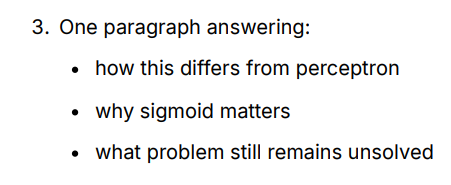


The perceptron makes a hard decision by outputting only 0 or 1, which means it cannot express uncertainty about its predictions. Logistic regression, on the other hand, produces probabilities using the sigmoid function, allowing the model to show how confident it is in a prediction.

The sigmoid function is important because it converts the linear score into a smooth probability between 0 and 1, enabling gradient-based learning and more informative outputs.

However, logistic regression still has a limitation: it can only learn linear decision boundaries, so it cannot solve problems where the classes are not linearly separable, such as XOR.